<a href="https://colab.research.google.com/github/aaceelll/Implementasi-Regresi-Rachel-Savitri-21120122140111/blob/main/Implementasi_Regresi_Rachel_Savitri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Rachel Savitri - 21120122140111 - Kelas C

Implementasi Regresi

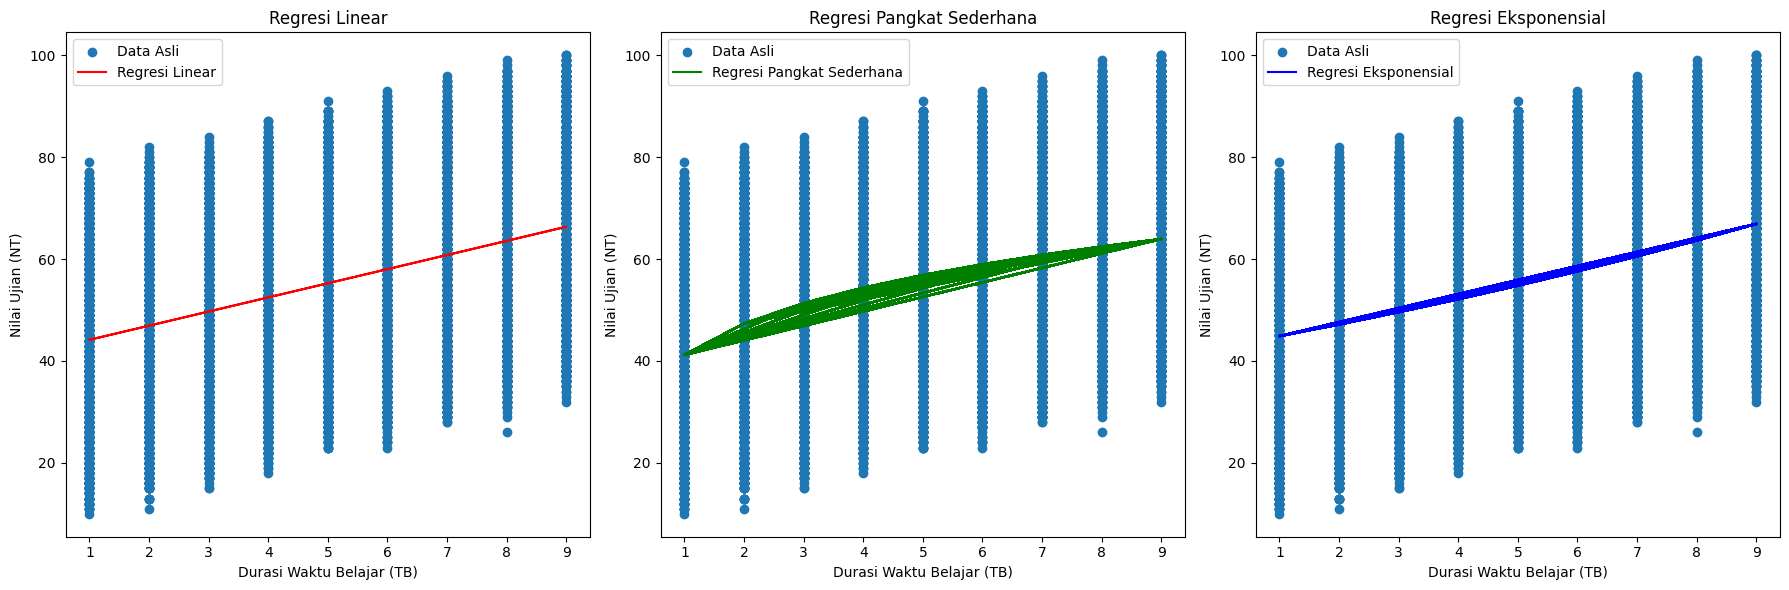

RMS galat - Regresi Linear: 17.819474832547773
RMS galat - Model Pangkat Sederhana: 17.886378846062684
RMS galat - Model Eksponensial: 17.82862874184692


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Membaca data dari file CSV
file_path = 'Student_Performance.csv'
df = pd.read_csv(file_path)

# Memisahkan kolom durasi waktu belajar dan nilai ujian
TB = df['Hours Studied'].values
NT = df['Performance Index'].values

# Metode 1 dengan menggunakan Metode Linear
linear_model = LinearRegression()
TB_reshaped = TB.reshape(-1, 1)
linear_model.fit(TB_reshaped, NT)
NT_pred_linear = linear_model.predict(TB_reshaped)
rms_linear = np.sqrt(mean_squared_error(NT, NT_pred_linear))

# Metode 2 dengan menggunakan Model Pangkat Sederhana
def power_law(x, a, b):
    return a * np.power(x, b)

params_power, _ = curve_fit(power_law, TB, NT)
NT_pred_power = power_law(TB, *params_power)
rms_power = np.sqrt(mean_squared_error(NT, NT_pred_power))

# Metode 3 dengan menggunakan Model Eksponensial
def exponential_model(x, a, b):
    return a * np.exp(b * x)

params_exp, _ = curve_fit(exponential_model, TB, NT, p0=(1, 0.1))
NT_pred_exp = exponential_model(TB, *params_exp)
rms_exp = np.sqrt(mean_squared_error(NT, NT_pred_exp))

# Plot grafik titik data dan hasil regresi
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.scatter(TB, NT, label='Data Asli')
plt.plot(TB, NT_pred_linear, color='red', label='Regresi Linear')
plt.xlabel('Durasi Waktu Belajar (TB)')
plt.ylabel('Nilai Ujian (NT)')
plt.title('Regresi Linear')
plt.legend()

plt.subplot(1, 3, 2)
plt.scatter(TB, NT, label='Data Asli')
plt.plot(TB, NT_pred_power, color='green', label='Regresi Pangkat Sederhana')
plt.xlabel('Durasi Waktu Belajar (TB)')
plt.ylabel('Nilai Ujian (NT)')
plt.title('Regresi Pangkat Sederhana')
plt.legend()

plt.subplot(1, 3, 3)
plt.scatter(TB, NT, label='Data Asli')
plt.plot(TB, NT_pred_exp, color='blue', label='Regresi Eksponensial')
plt.xlabel('Durasi Waktu Belajar (TB)')
plt.ylabel('Nilai Ujian (NT)')
plt.title('Regresi Eksponensial')
plt.legend()

plt.tight_layout()
plt.show()

print(f"RMS galat - Regresi Linear: {rms_linear}")
print(f"RMS galat - Model Pangkat Sederhana: {rms_power}")
print(f"RMS galat - Model Eksponensial: {rms_exp}")

# Bagian Baru